# Predicting Future Energy Consumption

LSTM as algorithm

# 1- Importing Key Modules

In [1]:
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import pprint
%matplotlib inline

In [4]:
# for deep learning
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

#2- Loading and preparing Data

In [6]:
df = pd.read_csv("AEP_hourly.csv")
df.shape

(121273, 2)

In [7]:
df.head()

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [8]:
df.describe()

,AEP_MW
count,121273.000000
mean,15499.513717
std,2591.399065
min,9581.000000
25%,13630.000000
50%,15310.000000
75%,17200.000000
max,25695.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB


- Datatime is not object. We need to convert it in correct format.
- We can also see there are no missing values

In [11]:
# double check
df.isnull().sum()

Datetime    0
AEP_MW      0
dtype: int64

In [12]:
# data-time format
dataset = df
dataset["Month"] = pd.to_datetime(df["Datetime"]).dt.month
dataset["Year"] = pd.to_datetime(df["Datetime"]).dt.year
dataset["Date"] = pd.to_datetime(df["Datetime"]).dt.date
dataset["Time"] = pd.to_datetime(df["Datetime"]).dt.time
dataset["Week"] = pd.to_datetime(df["Datetime"]).dt.week
dataset["Day"] = pd.to_datetime(df["Datetime"]).dt.day_name()
dataset = df.set_index("Datetime")
dataset.index = pd.to_datetime(dataset.index)
dataset.head()

,AEP_MW,Month,Year,Date,Time,Week,Day
Datetime,,,,,,,
2004-12-31 01:00:00,13478.0,12,2004,2004-12-31,01:00:00,53,Friday
2004-12-31 02:00:00,12865.0,12,2004,2004-12-31,02:00:00,53,Friday
2004-12-31 03:00:00,12577.0,12,2004,2004-12-31,03:00:00,53,Friday
2004-12-31 04:00:00,12517.0,12,2004,2004-12-31,04:00:00,53,Friday
2004-12-31 05:00:00,12670.0,12,2004,2004-12-31,05:00:00,53,Friday


In [13]:
#Unique values of Year

print(df.Year.unique(),"\n")
print("Total Number of Unique Year", df.Year.nunique(), "\n")

[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018] 

Total Number of Unique Year 15 



In this sequence, we do not have any missing value of year. They start from 2004 and end at 2018

# 3- Data Explortation

###3.1.energy consumption Each Year

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Energy Consumption According to Year')

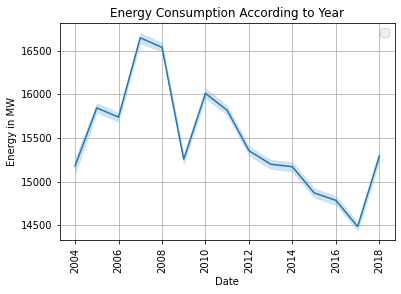

In [14]:
from matplotlib import style

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

sns.lineplot(x=dataset["Year"], y=dataset["AEP_MW"], data=df)
sns.set(rc={'figure.figsize':(15,6)})

plt.title("Energy consumptionnin Year 2004")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)


plt.title("Energy Consumption According to Year")

###3.2.Energy consumption with date-vice

No handles with labels found to put in legend.


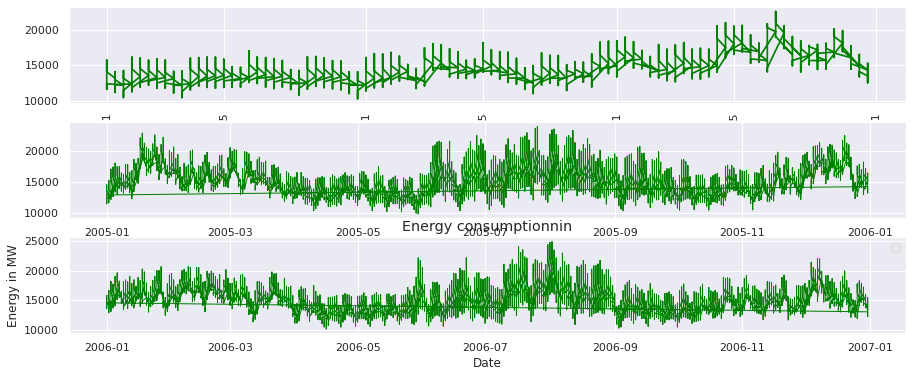

In [15]:
fig = plt.figure()

ax1= fig.add_subplot(311)
ax2= fig.add_subplot(312)
ax3= fig.add_subplot(313)


style.use('ggplot')

y_2004 = dataset["2004"]["AEP_MW"].to_list()
x_2004 = dataset["2004"]["Date"].to_list()
ax1.plot(x_2004,y_2004, color="green", linewidth=1.7)


y_2005 = dataset["2005"]["AEP_MW"].to_list()
x_2005 = dataset["2005"]["Date"].to_list()
ax2.plot(x_2005, y_2005, color="green", linewidth=1)


y_2006 = dataset["2006"]["AEP_MW"].to_list()
x_2006 = dataset["2006"]["Date"].to_list()
ax3.plot(x_2006, y_2006, color="green", linewidth=1)


plt.rcParams["figure.figsize"] = (18,8)
plt.title("Energy consumptionnin")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

### 3.3.Energy Distribution

Text(0.5, 1.0, 'Ennergy Distribution')

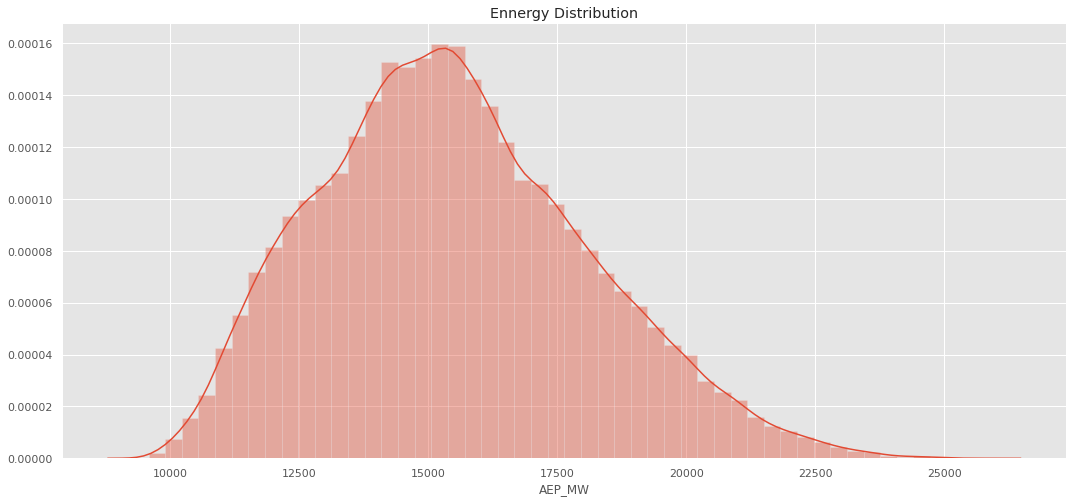

In [16]:
sns.distplot(dataset["AEP_MW"])
plt.title("Ennergy Distribution")

### 3.4.Energy with Respect to Time period

In [37]:
df.head()

,Datetime,AEP_MW,Month,Year,Date,Time,Week,Day
0,2004-12-31 01:00:00,13478.0,12,2004,2004-12-31,01:00:00,53,Friday
1,2004-12-31 02:00:00,12865.0,12,2004,2004-12-31,02:00:00,53,Friday
2,2004-12-31 03:00:00,12577.0,12,2004,2004-12-31,03:00:00,53,Friday
3,2004-12-31 04:00:00,12517.0,12,2004,2004-12-31,04:00:00,53,Friday
4,2004-12-31 05:00:00,12670.0,12,2004,2004-12-31,05:00:00,53,Friday


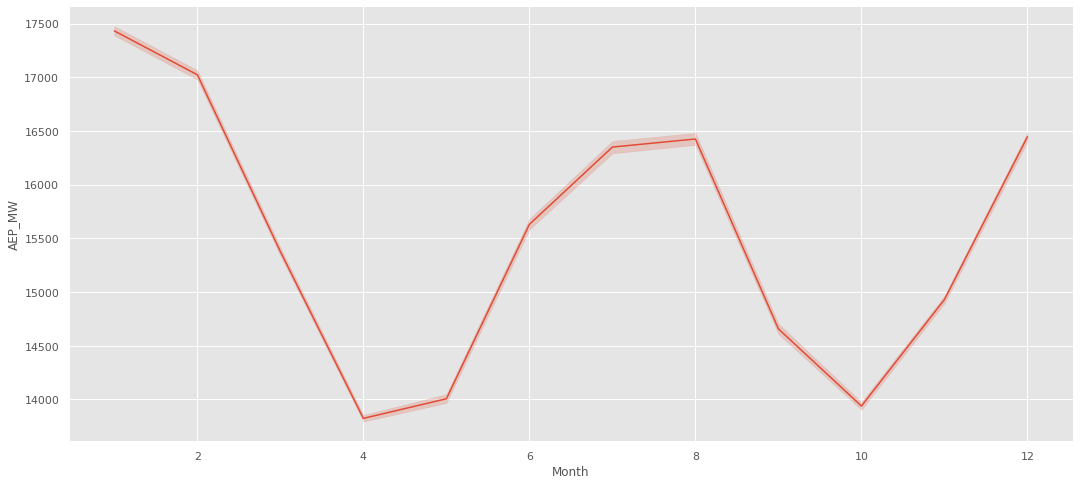

In [43]:
ax = sns.lineplot(x="Month", y="AEP_MW", data=df)

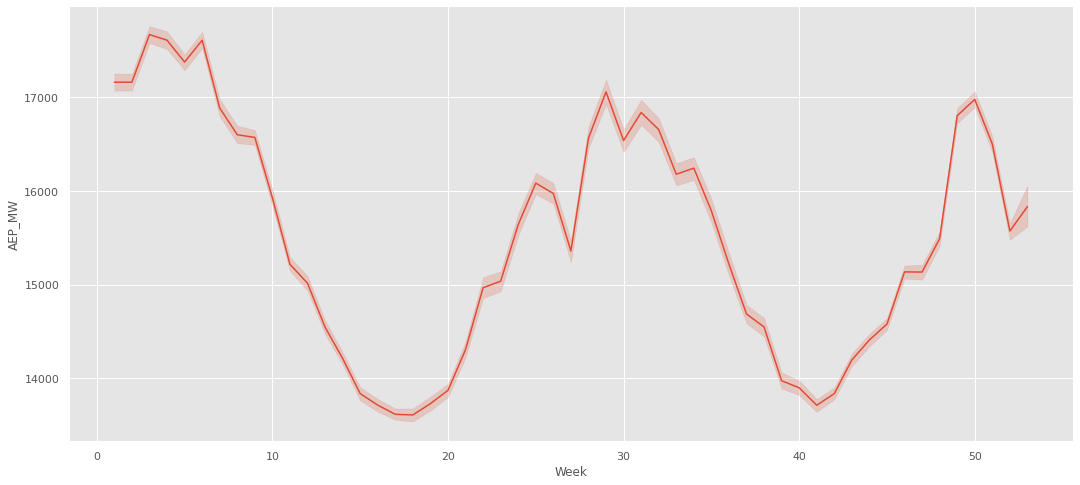

In [44]:
ax = sns.lineplot(x="Week", y="AEP_MW", data=df)

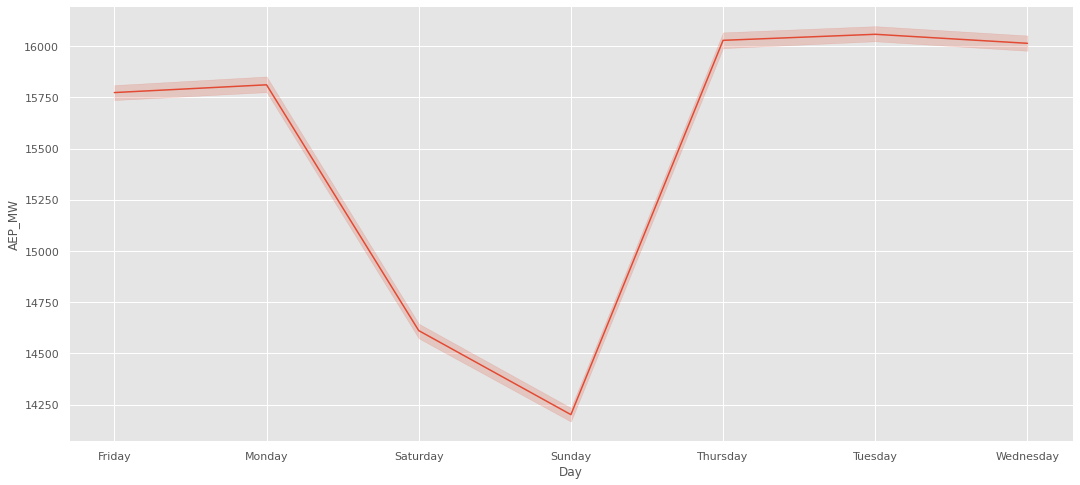

In [45]:
ax = sns.lineplot(x="Day", y="AEP_MW", data=df)

# 4- Model Building

In [46]:
#Resampleing Data
NewDataSet = dataset.resample('D').mean() #resample() is a method of pandas dataframes that can be used to summarize data by date or time

In [47]:
print("Old Dataset ",dataset.shape )
print("New  Dataset ",NewDataSet.shape )

Old Dataset  (121273, 7)
New  Dataset  (5055, 4)


### 4.1.Preparing data for train-test 

In [48]:
TestData = NewDataSet.tail(100)

Training_Set = NewDataSet.iloc[:,0:1]

Training_Set = Training_Set[:-60]

In [49]:
print("Training Set Shape ", Training_Set.shape)
print("Test Set Shape ", TestData.shape)

Training Set Shape  (4995, 1)
Test Set Shape  (100, 4)


### 4.2.Scaling

In [54]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)

In [56]:
Train[:5]

array([[0.27243207],
       [0.16328467],
       [0.09762599],
       [0.27451536],
       [0.28561719]])

In [57]:
X_Train = []
Y_Train = []

# Range should be fromm 60 Values to END 
for i in range(60, Train.shape[0]):
    
    # X_Train 0-59 
    X_Train.append(Train[i-60:i])
    
    # Y Would be 60 th Value based on past 60 Values 
    Y_Train.append(Train[i])

# Convert into Numpy Array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(4935, 60, 1)
(4935, 1)


### 4.3.Reshaping

In [58]:
# Shape should be Number of [Datapoints , Steps , 1 )
# we convert into 3-d Vector or #rd Dimesnsion
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train.shape

(4935, 60, 1)

# 5-LSTM Model 

### 5.1.Model Architecture

LSTM stacked

In [59]:
model = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

### 5.2. Train the model

In [61]:
model.fit(X_Train, Y_Train, epochs = 50, batch_size = 32)

Epoch 1/50
155/155 [==============================] - 18s 115ms/step - loss: 0.0234
Epoch 2/50
155/155 [==============================] - 19s 125ms/step - loss: 0.0184
Epoch 3/50
155/155 [==============================] - 19s 121ms/step - loss: 0.0170
Epoch 4/50
155/155 [==============================] - 19s 120ms/step - loss: 0.0167
Epoch 5/50
155/155 [==============================] - 19s 121ms/step - loss: 0.0159
Epoch 6/50
155/155 [==============================] - 19s 123ms/step - loss: 0.0157
Epoch 7/50
155/155 [==============================] - 19s 125ms/step - loss: 0.0151
Epoch 8/50
155/155 [==============================] - 21s 133ms/step - loss: 0.0144
Epoch 9/50
155/155 [==============================] - 19s 122ms/step - loss: 0.0121
Epoch 10/50
155/155 [==============================] - 19s 123ms/step - loss: 0.0104
Epoch 11/50
155/155 [==============================] - 19s 123ms/step - loss: 0.0092
Epoch 12/50
155/155 [==============================] - 19s 124ms/step - lo

### 5.3.Evaluate Model

In [ ]:
TestData.head(2)

In [ ]:
TestData.shape

In [ ]:
NewDataSet.shape

In [ ]:
# for having good enough data to evaluate, we concat
Df_Total = pd.concat((NewDataSet[["AEP_MW"]], TestData[["AEP_MW"]]), axis=0)

In [ ]:
Df_Total.shape

In [ ]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values
inputs.shape

In [ ]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values

# We need to Reshape
inputs = inputs.reshape(-1,1)

# Normalize the Dataset
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 160):
    X_test.append(inputs[i-60:i])
    
# Convert into Numpy Array
X_test = np.array(X_test)

# Reshape before Passing to Network
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Pass to Model 
predicted_stock_price = regressor.predict(X_test)

# Do inverse Transformation to get Values 
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### 5.4.Prediction Results

In [ ]:
True_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt  = predicted_stock_price
dates = TestData.index.to_list()

In [ ]:
Machine_Df = pd.DataFrame(data={
    "Date":dates,
    "TrueMegaWatt": True_MegaWatt,
    "PredictedMeagWatt":[x[0] for x in Predicted_MegaWatt ]
})

In [ ]:
Machine_Df.head()

In [ ]:
True_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt  = [x[0] for x in Predicted_MegaWatt ]
dates = TestData.index.to_list()

In [ ]:
fig = plt.figure()

ax1= fig.add_subplot(111)

x = dates
y = True_MegaWatt

y1 = Predicted_MegaWatt

plt.plot(x,y, color="green")
plt.plot(x,y1, color="red")
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.xlabel('Dates')
plt.ylabel("Power in MW")
plt.title("Machine Learned the Pattern Predicting Future Values ")
plt.legend()